In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2 сем/Анализ данных на Python/wine_Austral2.dat', sep='\t')
df[['rose', 'month_']].head()

,rose,month_
0,112,1
1,118,2
2,129,3
3,99,4
4,116,5


In [ ]:
df[['rose', 'month_']].describe()

,rose,month_
count,174.000000,174.000000
mean,93.005747,6.396552
std,38.753929,3.460460
min,30.000000,1.000000
25%,66.000000,3.000000
50%,87.000000,6.000000
75%,114.250000,9.000000
max,267.000000,12.000000


In [ ]:
len(df)

174

0. Пропусков нет. Рассмотрим ряд под названием "Розовые вина"

<Axes: >

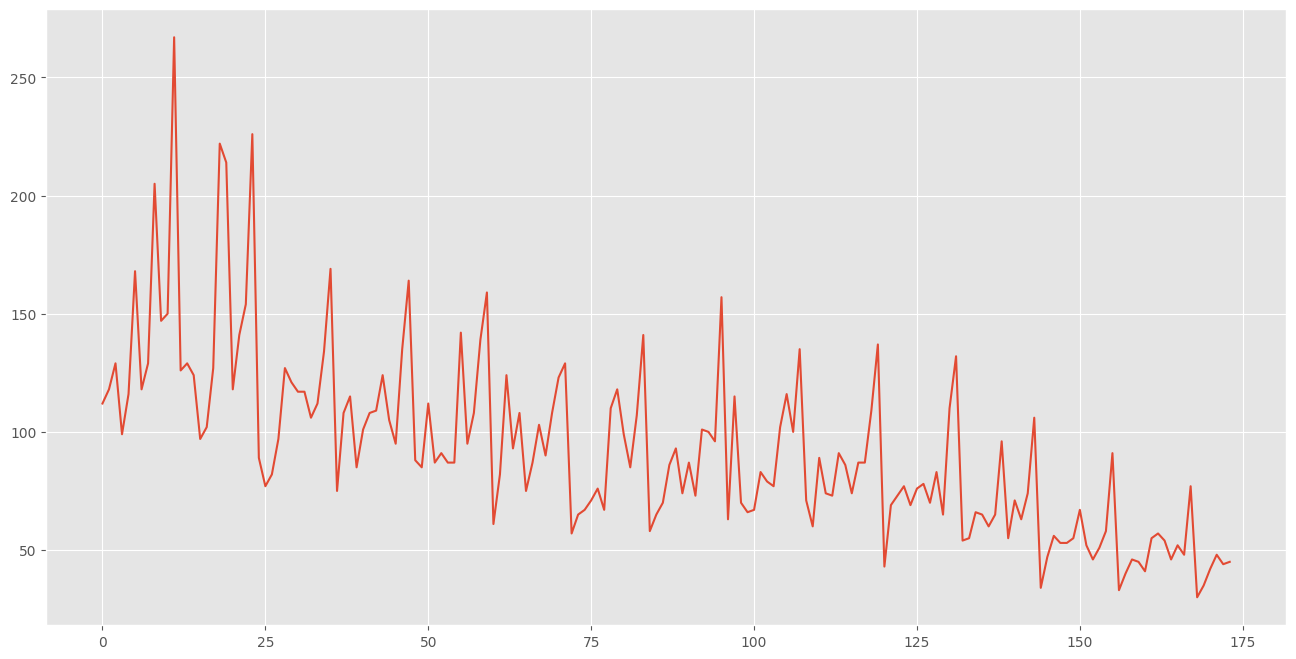

In [ ]:
y = df["rose"]
plt.figure(figsize=(16,8))
y.plot()

Наблюдается отличие в модели поведения ряда на первых месяцах наблюдений

1. Есть ли у ряда тренд? Если есть, то какой аналитической функцией его можно аппроксимировать? </br>
Тренд есть, кубическая функция.

2. Есть ли у ряда сезонность? Аддитивная или мультипликативная или какая-то еще? </br>
Есть сезонность, мультипликативная.

3. Меняет ли ряд свой характер? Если да, то нужно отбросить ранние наблюдения. </br>
В целом можно сказать, что не меняет.

4. Есть ли у ряда выбросы? Выброс может изменить модель и испортить прогноз. Заменяем выброс на более разумное значение. </br>
Выбросов нет.

In [ ]:
df_1 = df[['rose', 'month_']]

df_1['log_rose'] = np.log10(df_1["rose"])

<Axes: >

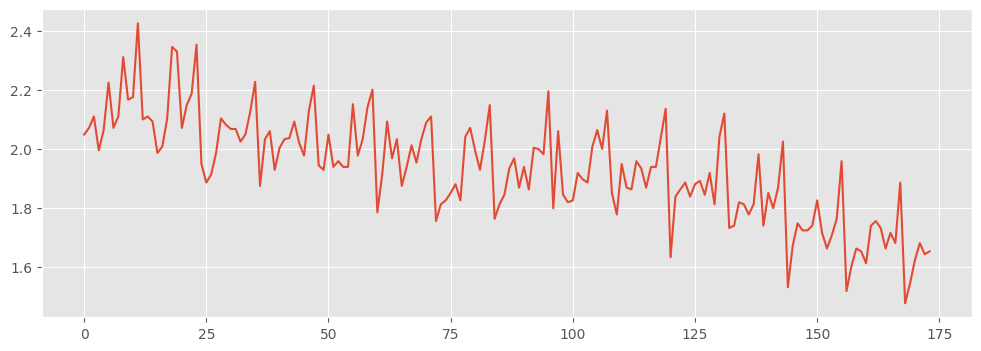

In [ ]:
fig = plt.figure(figsize=(12, 4))
df_1['log_rose'].plot()

Сезонные поправки стали аддитивными, что подтверждает гипотезу о мультипликативном характере сезонности исходного ряда.

In [ ]:
df_1['month_num'] = range(1, len(df_1) + 1)

In [ ]:
df_1

,rose,month_,log_rose,month_num
0,112,1,2.049218,1
1,118,2,2.071882,2
2,129,3,2.110590,3
3,99,4,1.995635,4
4,116,5,2.064458,5
...,...,...,...,...
169,35,2,1.544068,170
170,42,3,1.623249,171
171,48,4,1.681241,172
172,44,5,1.643453,173


In [ ]:
df_2 = df_1.drop(columns=['rose'])
df_2

,month_,log_rose,month_num
0,1,2.049218,1
1,2,2.071882,2
2,3,2.110590,3
3,4,1.995635,4
4,5,2.064458,5
...,...,...,...
169,2,1.544068,170
170,3,1.623249,171
171,4,1.681241,172
172,5,1.643453,173


In [ ]:
#Отделение тестового множества (последние 8 наблюдений)
test_data = df_2.tail(12)

In [ ]:
test_data["m11"] = [1,0,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m12"] = [0,1,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m01"] = [0,0,1,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m02"] = [0,0,0,1,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m03"] = [0,0,0,0,1,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m04"] = [0,0,0,0,0,1,0,0,0,0,0,0][0: len(test_data) ]
test_data["m05"] = [0,0,0,0,0,0,1,0,0,0,0,0][0: len(test_data) ]
test_data["m06"] = [0,0,0,0,0,0,0,1,0,0,0,0][0: len(test_data) ]
test_data["m07"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m08"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m09"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]
test_data["m10"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(test_data) ]

In [ ]:
test_data

,month_,log_rose,month_num,m11,m12,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10
162,7,1.755875,163,1,0,0,0,0,0,0,0,0,0,0,0
163,8,1.732394,164,0,1,0,0,0,0,0,0,0,0,0,0
164,9,1.662758,165,0,0,1,0,0,0,0,0,0,0,0,0
165,10,1.716003,166,0,0,0,1,0,0,0,0,0,0,0,0
166,11,1.681241,167,0,0,0,0,1,0,0,0,0,0,0,0
167,12,1.886491,168,0,0,0,0,0,1,0,0,0,0,0,0
168,1,1.477121,169,0,0,0,0,0,0,1,0,0,0,0,0
169,2,1.544068,170,0,0,0,0,0,0,0,1,0,0,0,0
170,3,1.623249,171,0,0,0,0,0,0,0,0,0,0,0,0
171,4,1.681241,172,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = test_data.drop(columns=['month_', 'log_rose', 'm01'])

In [ ]:
y = test_data['log_rose']

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

In [ ]:
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.006152156444321932


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape_value = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape_value)

Mean Absolute Percentage Error (MAPE): 0.0037250946435710684


<Axes: >

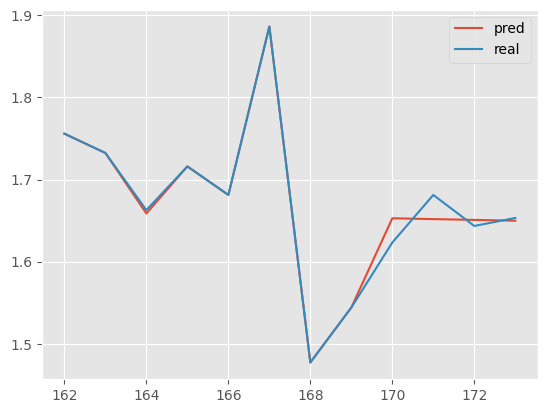

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [ ]:
df_5= pd.DataFrame()

df_5['month_num'] = range(175, 175+8)

In [ ]:
df_5["m11"] = [0,0,0,0,1,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m12"] = [0,0,0,0,0,1,0,0,0,0,0,0][0: len(df_5) ]
#df_5["m01"] = [0,0,0,0,0,0,1,0,0,0,0,0][0: len(df_5) ]
df_5["m02"] = [0,0,0,0,0,0,0,1,0,0,0,0][0: len(df_5) ]
df_5["m03"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m04"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m05"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m06"] = [0,0,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m07"] = [1,0,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m08"] = [0,1,0,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m09"] = [0,0,1,0,0,0,0,0,0,0,0,0][0: len(df_5) ]
df_5["m10"] = [0,0,0,1,0,0,0,0,0,0,0,0][0: len(df_5) ]

In [ ]:
df_5

,month_num,m11,m12,m02,m03,m04,m05,m06,m07,m08,m09,m10
0,175,0,0,0,0,0,0,0,1,0,0,0
1,176,0,0,0,0,0,0,0,0,1,0,0
2,177,0,0,0,0,0,0,0,0,0,1,0
3,178,0,0,0,0,0,0,0,0,0,0,1
4,179,1,0,0,0,0,0,0,0,0,0,0
5,180,0,1,0,0,0,0,0,0,0,0,0
6,181,0,0,0,0,0,0,0,0,0,0,0
7,182,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
model.predict(df_5)


array([1.64888168, 1.64790642, 1.64693117, 1.64595591, 1.74027074,
       1.71678965, 1.64303014, 1.70039923])

In [ ]:
10**model.predict(df_5)

array([44.55348508, 44.45354747, 44.35383402, 44.25434424, 54.98835667,
       52.09423264, 43.95721189, 50.16481661])

In [ ]:
pred['forecast'] = np.nan
pred.head()

,pred,real,forecast
162,1.755875,1.755875,NaN
163,1.732394,1.732394,NaN
164,1.658634,1.662758,NaN
165,1.716003,1.716003,NaN
166,1.681241,1.681241,NaN


In [ ]:
df_6 = pd.DataFrame(model.predict(df_5), columns=['forecast'])
df_6['real'] = np.nan
df_6['pred'] = np.nan
df_6.head()

,forecast,real,pred
0,1.648882,NaN,NaN
1,1.647906,NaN,NaN
2,1.646931,NaN,NaN
3,1.645956,NaN,NaN
4,1.740271,NaN,NaN


In [ ]:
pred_1 = pd.concat(
    [pred, df_6],
    sort=False
).reset_index(drop=True)

<Axes: >

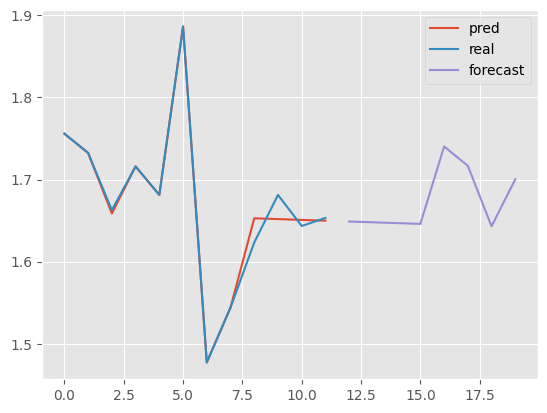

In [ ]:
pred_1.plot()